## **1.0. Importing the installed Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)



---



## **1.2. Loading the dataset**

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

In [3]:
df = pd.read_csv("vehicles.csv")
# To display the top 5 rows
df.head(3)

,Make,Model,Year,Engine Fuel Type,HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [4]:
df.tail(5)                        # To display the botton 5 rows

,Make,Model,Year,Engine Fuel Type,HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995




---



## **1.3. Checking the types of data**

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [5]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
HP                   float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object



---



## **1.4. Dropping irrelevant columns**

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size are not relavent.

In [6]:
df = df.drop(columns = ['Engine Fuel Type','Market Category','Vehicle Style','Popularity','Number of Doors','Vehicle Size'], axis = 1)
df.head(5)

,Make,Model,Year,HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



## **1.5. Renaming the columns**

In this instance, most of the column names are very confusing to read, just tweaked their column names. This is a good approach it improves the readability of the data set.

In [7]:
df = df.rename(columns = {'Engine HP':'HP', 'Engine Cylinders':'Cylinders', 
                          'Transmission Type' : 'Transmission', 'Driven_Wheels' : 'Drive_Mode',
                         'highway MPG':'MPG_H', 'city mpg' : 'MPG_C', 'MSRP': 'Price'})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



## **1.6. Dropping the duplicate rows**

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, remove all the duplicate value from the data-set. For example prior to removing dataset had 11914 rows of data but after removing the duplicates 10925 data meaning that dataset had 989 of duplicate data.

In [8]:
df.shape

(11914, 10)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


Now let us remove the duplicate data because it's ok to remove them.

## **1.7. Counting the number of Rows**

In [10]:
df.count()      # Used to count the number of rows

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive_Mode      11914
MPG_H           11914
MPG_C           11914
Price           11914
dtype: int64

above there are 11914 rows and we are removing 989 rows of duplicate data.

## **1.8. Dropping the Duplicate Values**

In [11]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [12]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive_Mode      10925
MPG_H           10925
MPG_C           10925
Price           10925
dtype: int64

In [13]:
df.shape

(10925, 10)



---



## **2.0. Dropping the missing or null values.**

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, We just dropped that missing values. This is because there is nearly 99 missing value compared to 10,000 values this is a small number and this is negligible so we just dropped those values.

In [15]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive_Mode       0
MPG_H            0
MPG_C            0
Price            0
dtype: int64


This is the reason in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.

In [16]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive_Mode      10827
MPG_H           10827
MPG_C           10827
Price           10827
dtype: int64

Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).

In [17]:
print(df.isnull().sum())   # After dropping the values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive_Mode      0
MPG_H           0
MPG_C           0
Price           0
dtype: int64




---



## **3.0. Detecting Outliers**

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that We are going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers.

<Axes: xlabel='Price'>

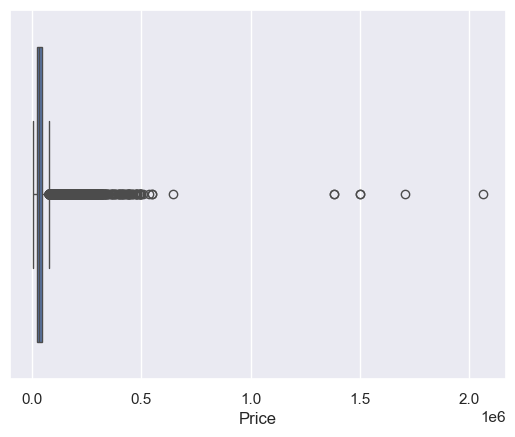

In [19]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

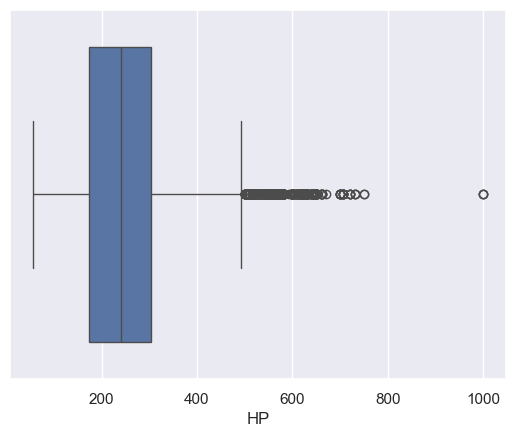

In [20]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

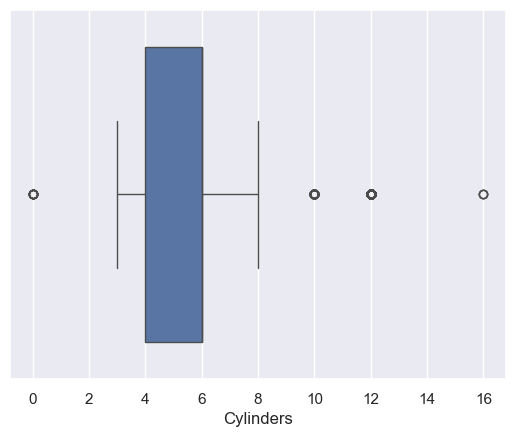

In [21]:
sns.boxplot(x=df['Cylinders'])

## **4.0. Correlation of different features**

* Bar Chart: A bar chart is used to compare different categories of data. It consists of rectangular bars, and the length or height of each bar is proportional to the value it represents. Bar charts can be displayed horizontally or vertically and are useful for showing variations in value among different groups.
* Line Graph: A line graph displays information as a series of data points connected by straight line segments. It’s often used to visualize data that changes over time. Line graphs are ideal for showing trends and patterns in data, such as sales figures over a year or temperature changes during a month.
* Scatter Plot: A scatter plot uses dots to represent values obtained for two different variables - one plotted along the x-axis and the other plotted along the y-axis. Scatter plots are used to observe relationships between variables, often to see if they are correlated.
* Pie Chart: A pie chart is a circular statistical graphic divided into slices to illustrate numerical proportion. Each slice of the pie represents a category, and its size is proportional to the frequency or percentage of the category. Pie charts are best used when you want to compare parts of a whole; they do not show changes over time.

## **Price vs Make**

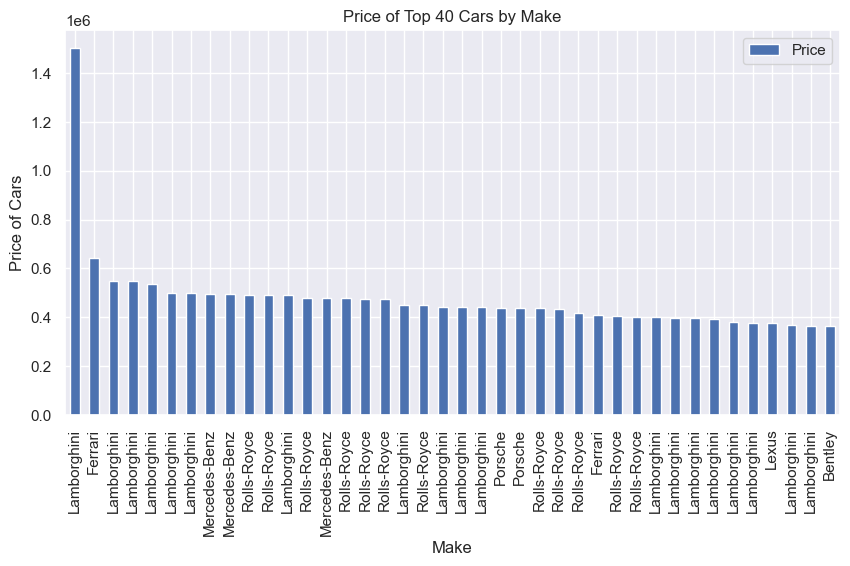

In [22]:
top15 = df['Make'].value_counts().nlargest(40)
top15_df = df[df['Make'].isin(top15.index)].sort_values('Price', ascending=False).head(40)

# Now plot the bar chart for the top 40 cars
top15_df.plot(x='Make', y='Price', kind='bar', figsize=(10,5))
plt.title("Price of Top 40 Cars by Make")
plt.ylabel('Price of Cars')
plt.xlabel('Make')
plt.show()



## **Number of Cars vs Make**

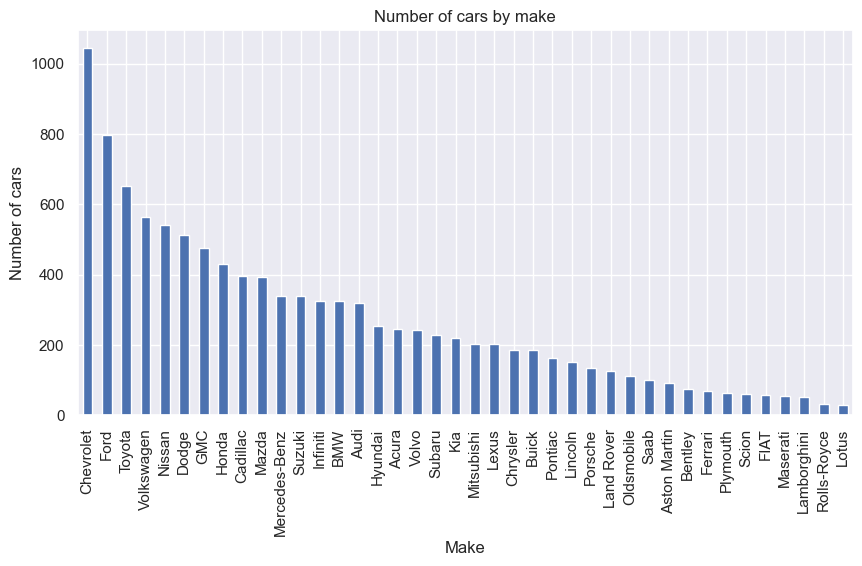

In [23]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

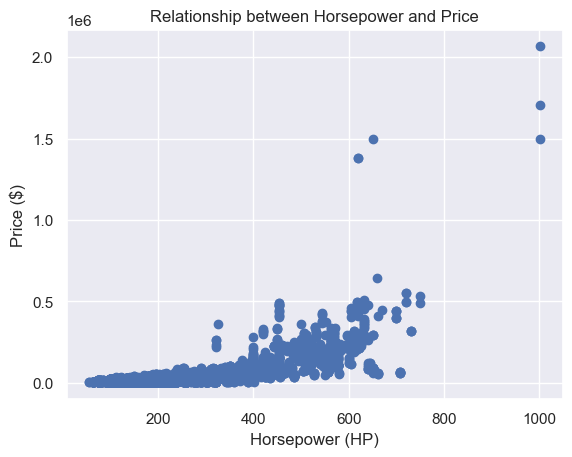

In [24]:
plt.scatter(df['HP'], df['Price'])
plt.title('Relationship between Horsepower and Price')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Price ($)')
plt.show()


C:\Users\shada\AppData\Local\Temp\ipykernel_4820\2792132387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_model_df.sort_values('Year', inplace=True)


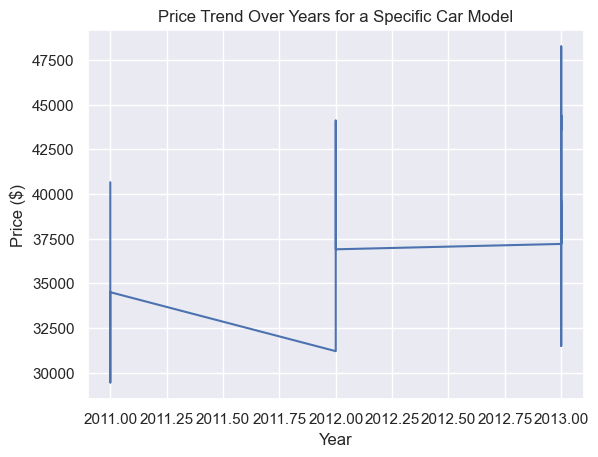

In [25]:
specific_model_df = df[(df['Make'] == 'BMW') & (df['Model'] == '1 Series')]
specific_model_df.sort_values('Year', inplace=True)

plt.plot(specific_model_df['Year'], specific_model_df['Price'])
plt.title('Price Trend Over Years for a Specific Car Model')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.show()


## **Data vs the Year**

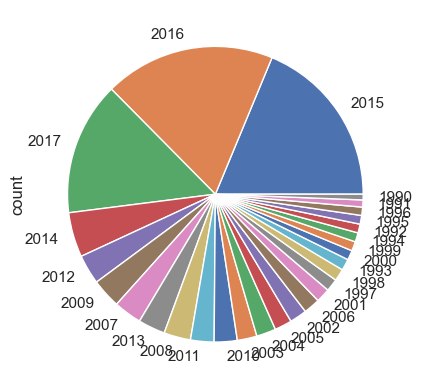

In [26]:
df.Year.value_counts().plot(kind='pie')
plt.show()

In [27]:
df

,Make,Model,Year,HP,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [28]:
df = df.drop(columns=['Make','Model','Drive_Mode','Transmission'])

## **4.0. Correlation of different features**

In [29]:
df.corr()

,Year,HP,Cylinders,MPG_H,MPG_C,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG_H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
MPG_C,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


<Axes: >

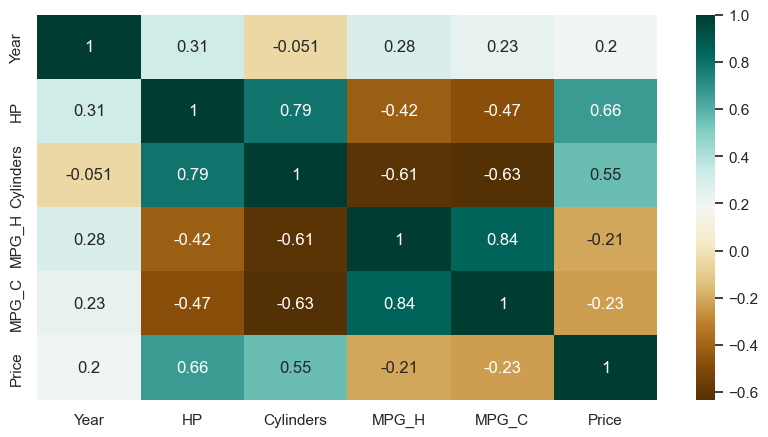

In [30]:
# Adjusting the Size of Figure
plt.figure(figsize=(10,5))
# calculating the Correlation
correlation = df.corr()
# Displaying the correlation using the Heap Map
sns.heatmap(correlation,cmap="BrBG",annot=True) # Br: Brown. B: Blue, G: Green

#correlation